In [116]:
# define a pytensor Op for our likelihood function
from pl_temp_fit import Exp_data_utils, fit_EL_exp_EMCEE

import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
import os
import json
import uuid
import numpy as np
from pl_temp_fit import config_utils
from pl_temp_fit import covariance_utils, generate_data_utils,LTL, fit_EL_utils

os.chdir('/rds/general/user/ma11115/home/pl_temp_fit/') 
#os.chdir('C:\\Users\\ma11115\\OneDrive - Imperial College London\\pl_temp_fit')

In [117]:
# read csv data from folder
import importlib
import glob
csv_files = glob.glob('experiemental_data/blends/*.csv')
for id, file in enumerate(csv_files):
    print(id, file)


0 experiemental_data/blends/PM6Y61_1PL.csv
1 experiemental_data/blends/PM6Y61_1_test_EL.csv
2 experiemental_data/blends/PM6Y61_1EL.csv
3 experiemental_data/blends/PM6Y61_1_test_PL.csv


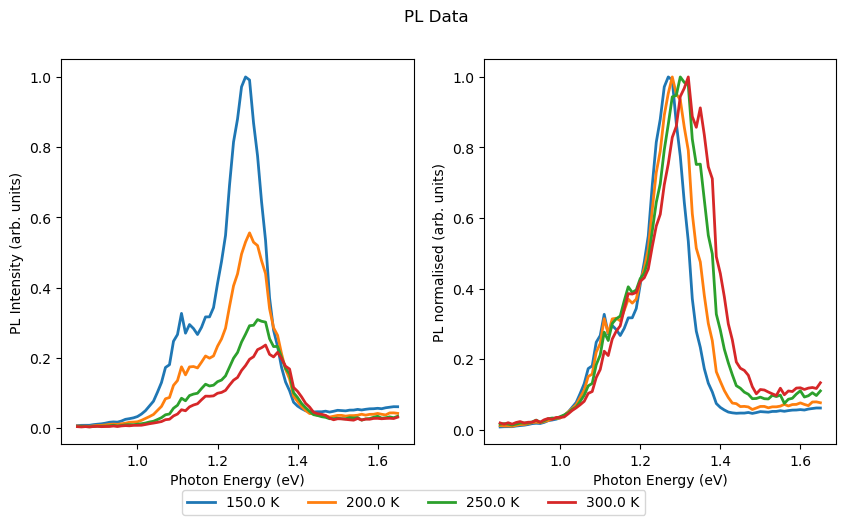

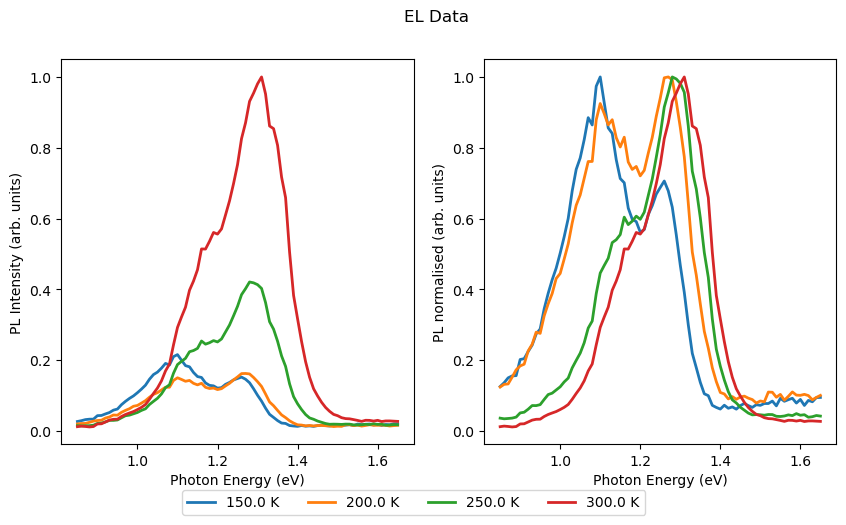

In [118]:
# plot EL and PL data
csv_name_PL=csv_files[3]#3 for y6, 18 for ITIC,12 for L8BO
csv_name_EL=csv_files[1]#3 for y6, 18 for ITIC,12 for L8BO
Exp_data_PL, temperature_list_PL, hws_PL = Exp_data_utils.read_data(csv_name_PL)
fig,ax = Exp_data_utils.plot_PL_data(Exp_data_PL, temperature_list_PL, hws_PL,title="PL Data")
Exp_data_EL, temperature_list_EL, hws_EL = Exp_data_utils.read_data(csv_name_EL)
fig,ax = Exp_data_utils.plot_PL_data(Exp_data_EL, temperature_list_EL, hws_EL,title="EL Data")

In [119]:
# initialise parameters for the model

importlib.reload(config_utils)

(
    number_free_parameters,
    Temp_std_err,
    hws_std_err,
    relative_intensity_std_error_PL,
    relative_intensity_std_error_EL,
    sigma,
) = (5, 10, 0.005, 0.05, 0.1,0.001)
fixed_parameters_dict = {
    "EX":{"E":1.37,"sigma":0.001,"LI":7.8e-2,"L0":0.11,"H0":0.159},
    "CT":{'off':0,"sigma":0.001},  
    "D":{},
}
params_to_fit_init ={
    "EX":{"E":1.37,"sigma":0.001,"LI":7.8e-2,"L0":0.11,"H0":0.159},
    "CT":{"E":1.2,"LI":7.8e-2,"L0":0.11,"H0":0.159,"log_fosc":-3},
    "D":{'log_kEXCT':10},
}
min_bounds = {
    "EX":{"E":1.3,"sigma":0.001,"LI":0.03,"L0":0.03,"H0":0.1},
    "CT":{"E":0.8,"LI":0.03,"L0":0.03,"H0":0.1,"log_fosc":-5},
    "D":{'log_kEXCT':8},
}
max_bounds = {
    "EX":{"E":1.5,"sigma":0.03,"LI":0.2,"L0":0.2,"H0":0.2},
    "CT":{"E":1.35,"LI":0.2,"L0":0.2,"H0":0.2,"log_fosc":-1},
    "D":{'log_kEXCT':12},
}
# save the model config
model_config, test_id = config_utils.save_model_config(
    csv_name_PL,
    csv_name_EL,
    Temp_std_err,
    hws_std_err,
    relative_intensity_std_error_PL,
    relative_intensity_std_error_EL,
    temperature_list_PL,
    hws_PL,
    temperature_list_EL,
    hws_EL,
    sigma,
    fixed_parameters_dict,
    params_to_fit_init,
    min_bounds,
    max_bounds,
)

size of hw is (81,)
size of temperature_list is (4,)


In [120]:
model_config,model_config_save = config_utils.load_model_config(test_id)
fixed_parameters_dict, params_to_fit, min_bound, max_bound = config_utils.get_dict_params(model_config_save)
model_config['temperature_list_EL'] = temperature_list_EL
model_config['hws_EL'] = hws_EL
model_config['temperature_list_PL'] = temperature_list_PL
model_config['hws_PL'] = hws_PL
save_folder = model_config_save['save_folder']

shape of mean value plot is (81, 4)
shape of mean value plot is (81, 4)


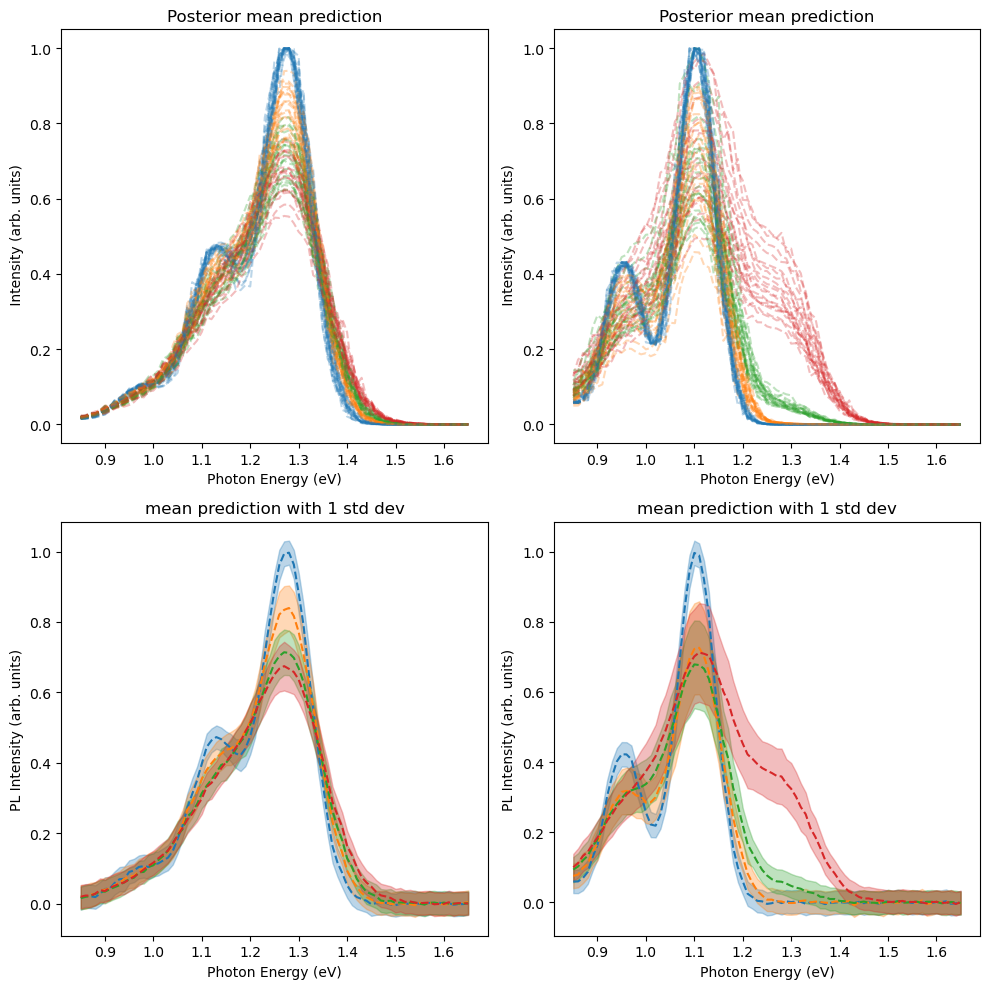

In [121]:
#%autoreload 2

import importlib
importlib.reload(generate_data_utils)
importlib.reload(covariance_utils)
importlib.reload(LTL)
# get the variance of the data and plot it

co_var_mat_PL, co_var_mat_EL, variance_EL, variance_PL = (
    covariance_utils.plot_generated_data(
        save_folder,
        model_config,
        savefig=True,
        fixed_parameters_dict=fixed_parameters_dict,
        params_to_fit=params_to_fit_init,
    )
)

In [89]:

import importlib

importlib.reload(generate_data_utils)
importlib.reload(covariance_utils)
importlib.reload(LTL)
importlib.reload(fit_EL_utils)

soln = fit_EL_utils.get_maximum_likelihood_estimate(
    Exp_data_EL,
    Exp_data_PL,
    co_var_mat_PL,
    co_var_mat_EL,
    model_config,
    save_folder,
    num_coords=1,
    fixed_parameters_dict=fixed_parameters_dict,
    params_to_fit=params_to_fit_init,
    min_bound=min_bounds,
    max_bound=max_bounds,
)

running the minimisation
step 0
EL loglike is [[-8414.50286961]]
EL loglike is [[-8414.50277517]]
EL loglike is [[-8414.5028866]]
EL loglike is [[-8414.50286961]]
EL loglike is [[-8414.50286961]]
EL loglike is [[-8414.50286961]]
EL loglike is [[-8414.50144096]]
EL loglike is [[-8414.50286961]]
EL loglike is [[-8414.50286961]]
EL loglike is [[-8414.50286961]]
EL loglike is [[-8414.50287328]]
EL loglike is [[-8414.50286779]]
EL loglike is [[-3003.40880806]]
EL loglike is [[-3003.40843388]]
EL loglike is [[-3003.40877006]]
EL loglike is [[-3003.40880806]]
EL loglike is [[-3003.40880806]]
EL loglike is [[-3003.40880806]]
EL loglike is [[-3003.40874352]]
EL loglike is [[-3003.40880806]]
EL loglike is [[-3003.40880806]]
EL loglike is [[-3003.40880806]]
EL loglike is [[-3003.40880527]]
EL loglike is [[-3003.40881065]]
EL loglike is [[-3375.36959731]]
EL loglike is [[-3375.36975817]]
EL loglike is [[-3375.36961193]]
EL loglike is [[-3375.36959731]]
EL loglike is [[-3375.36959731]]
EL loglike i

/rds/general/user/ma11115/home/pl_temp_fit/src/pl_temp_fit/PL_Events.py:61: RuntimeWarning: overflow encountered in exp
  EX0 = CT0 * np.exp(-(EX.E-CT.E)/C.kb*D.T) / D.RCTE
/rds/general/user/ma11115/home/pl_temp_fit/src/pl_temp_fit/PL_Events.py:33: RuntimeWarning: invalid value encountered in multiply
  D.kr_hw = EX.kr_hw * EX.Sum + CT.kr_hw * CT.Sum
/rds/general/user/ma11115/home/pl_temp_fit/src/pl_temp_fit/generate_data_utils.py:190: RuntimeWarning: invalid value encountered in divide
  model_data_EL = model_data_EL / np.max(model_data_EL.reshape(-1, 1))
/rds/general/user/ma11115/home/pl_temp_fit/src/pl_temp_fit/generate_data_utils.py:194: RuntimeWarning: invalid value encountered in divide
  model_data_PL = model_data_PL / np.max(model_data_PL.reshape(-1, 1))
/rds/general/user/ma11115/home/anaconda3/envs/pymc_env/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


EL loglike is [[-710.26257232]]
EL loglike is [[-710.26279844]]
EL loglike is [[-710.26260938]]
EL loglike is [[-710.26257232]]
EL loglike is [[-710.26257232]]
EL loglike is [[-710.26257232]]
EL loglike is [[-710.2618725]]
EL loglike is [[-710.26257232]]
EL loglike is [[-710.26257232]]
EL loglike is [[-710.26257232]]
EL loglike is [[-710.26259869]]
EL loglike is [[-710.26255207]]
[ 1.38873815e+00  1.00000000e-03  7.83661706e-02  1.09607558e-01
  1.58709229e-01  1.26280333e+00  7.75364472e-02  1.11988235e-01
  1.57226008e-01 -3.65196633e+00  9.30497585e+00]
Maximum likelihood estimates:
  EX_E = 1.389
  EX_sigma = 0.001
  EX_LI = 0.078
  EX_L0 = 0.110
  EX_H0 = 0.159
  CT_E = 1.263
  CT_LI = 0.078
  CT_L0 = 0.112
  CT_H0 = 0.157
  CT_log_fosc = -3.652
  D_log_kEXCT = 9.305
Maximum log likelihood: 3062.057841386745


(<Figure size 2000x500 with 4 Axes>,
 array([<Axes: title={'center': 'temperature=150.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=200.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=250.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=300.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>],
       dtype=object))

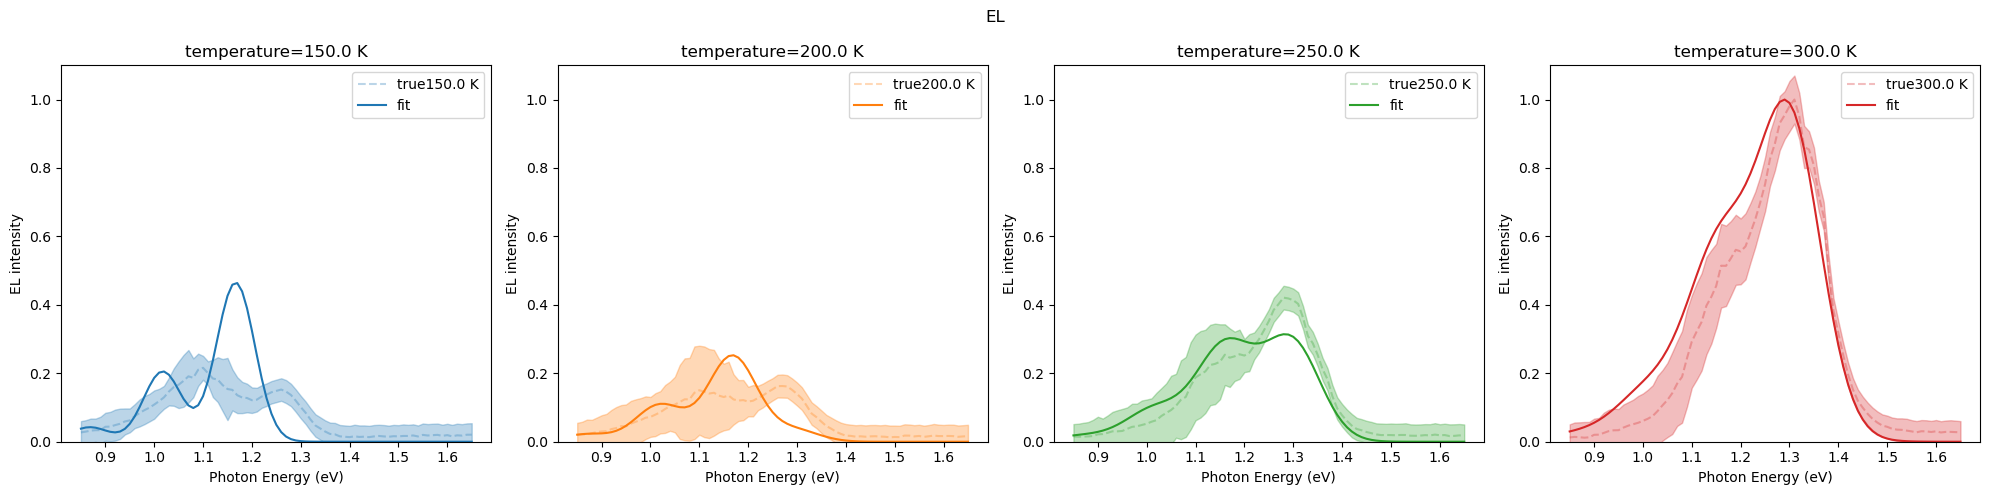

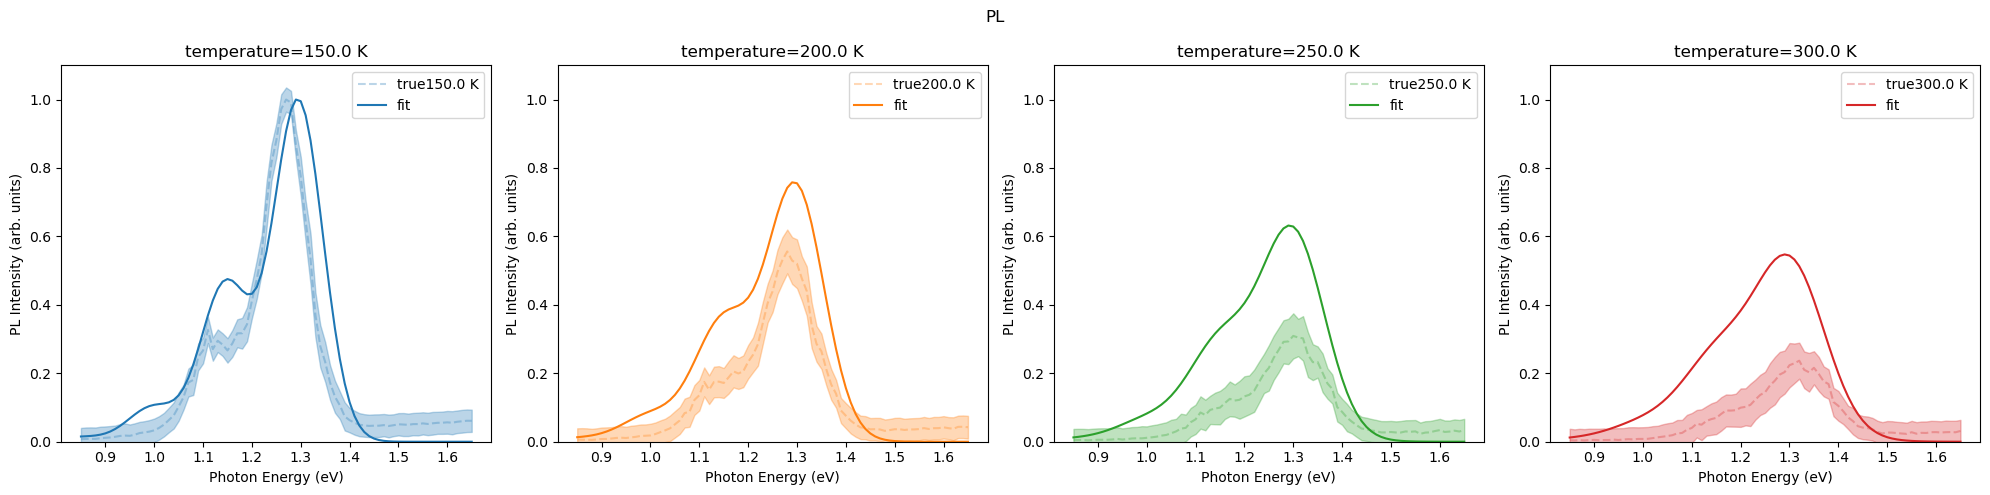

In [122]:
importlib.reload(fit_EL_utils)

true_parameters = fit_EL_utils.get_param_dict(params_to_fit_init,soln.x)
fit_EL_utils.plot_exp_data_with_variance(
    temperature_list_EL,
    hws_EL,
    temperature_list_PL,
    hws_PL,
    variance_EL,
    variance_PL,
    save_folder,
    fixed_parameters_dict,
    true_parameters,
    Exp_data_PL,
    Exp_data_EL,
)

shape of mean value plot is (81, 4)
shape of mean value plot is (81, 4)


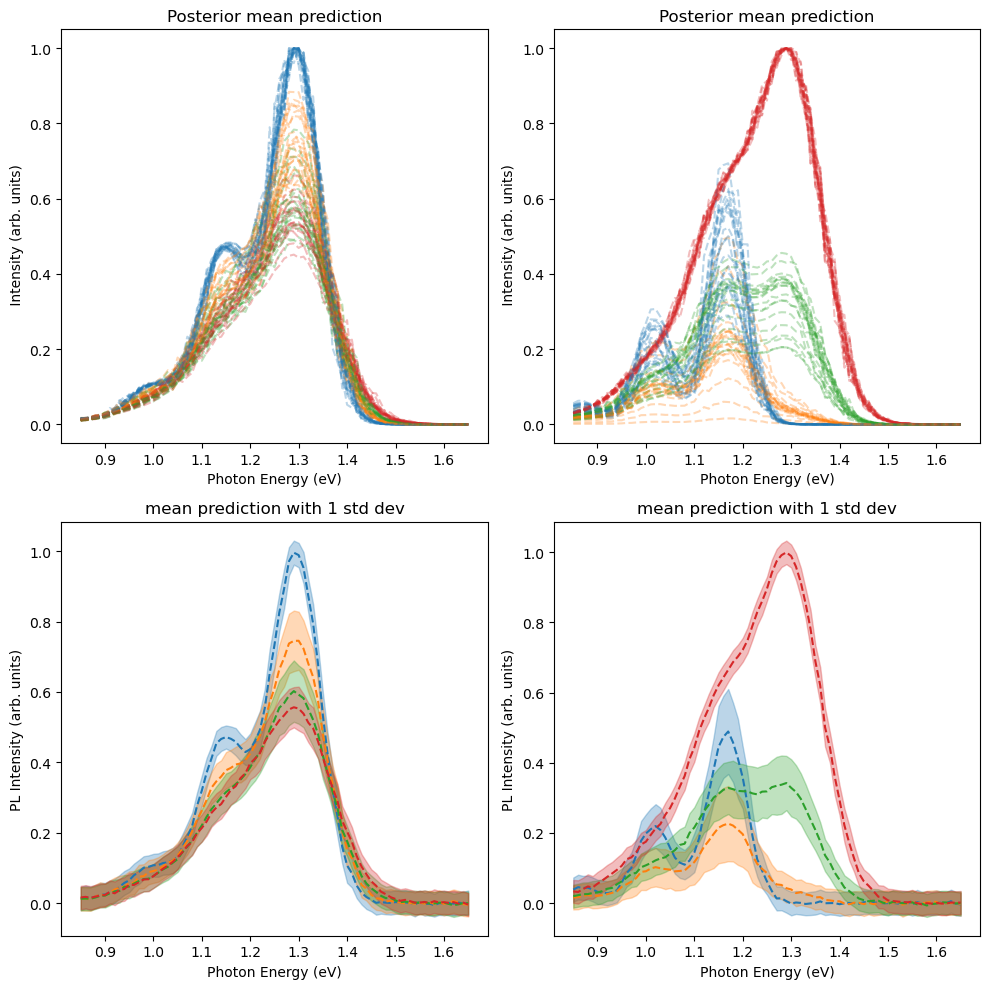

In [94]:
co_var_mat_PL, co_var_mat_EL, variance_EL, variance_PL = (
    covariance_utils.plot_generated_data(
        save_folder,
        model_config,
        savefig=True,
        fixed_parameters_dict=fixed_parameters_dict,
        params_to_fit=true_parameters,
    )
)

In [123]:

importlib.reload(generate_data_utils)
importlib.reload(covariance_utils)
importlib.reload(LTL)

fit_EL_utils.run_sampler_single(
    save_folder,
    Exp_data_EL,
    Exp_data_PL,
    co_var_mat_EL,
    co_var_mat_PL,
    params_to_fit_init,
    fixed_parameters_dict,
    min_bounds,
    max_bounds,
    model_config,
    nsteps=5,
    coeff_spread=1,
    num_coords = 32,
)


Initial size: 0


  0%|          | 0/5 [00:00<?, ?it/s]/rds/general/user/ma11115/home/anaconda3/envs/pymc_env/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 5/5 [01:16<00:00, 15.27s/it]

single process took 97.1 seconds


## submitting jobs to the hpc


In [248]:
# submit to HPC
import glob
csv_files = glob.glob('experiemental_data/blends/*.csv')
for id,csv_file in enumerate(csv_files):
    print(id,csv_file)


0 experiemental_data/blends/PM6Y61_1PL.csv
1 experiemental_data/blends/PM6Y61_1_test_EL.csv
2 experiemental_data/blends/PM6Y61_1EL.csv
3 experiemental_data/blends/PM6Y61_1_test_PL.csv


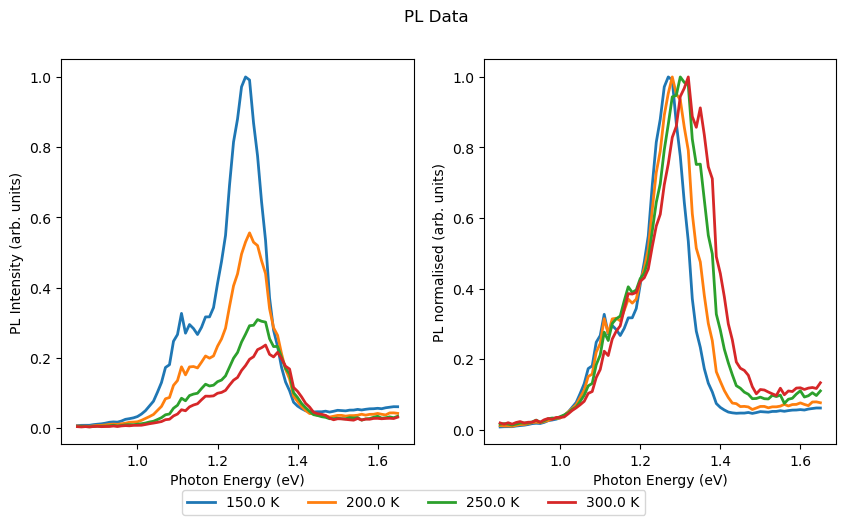

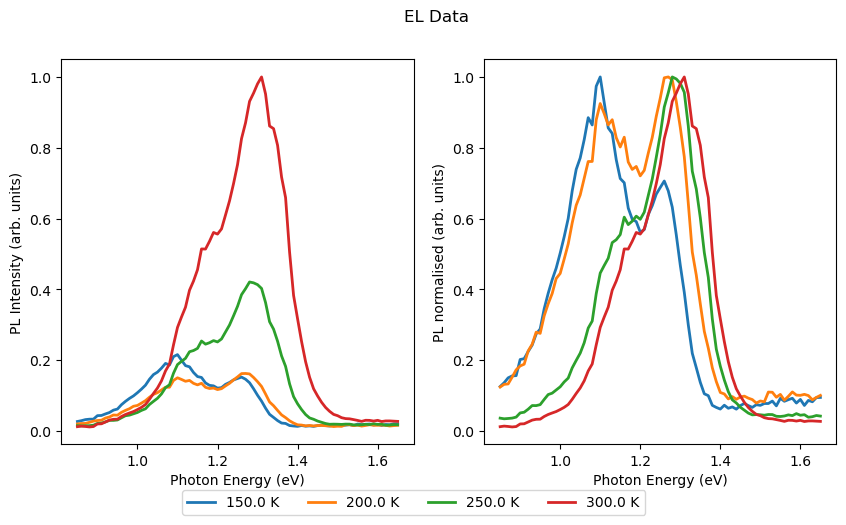

In [249]:
# plot EL and PL data
csv_name_PL=csv_files[3]
csv_name_EL=csv_files[1]
Exp_data_PL, temperature_list_PL, hws_PL = Exp_data_utils.read_data(csv_name_PL)
fig,ax = Exp_data_utils.plot_PL_data(Exp_data_PL, temperature_list_PL, hws_PL,title="PL Data")
Exp_data_EL, temperature_list_EL, hws_EL = Exp_data_utils.read_data(csv_name_EL)
fig,ax = Exp_data_utils.plot_PL_data(Exp_data_EL, temperature_list_EL, hws_EL,title="EL Data")

In [250]:
# initialise parameters for the model

importlib.reload(config_utils)

(
    number_free_parameters,
    Temp_std_err,
    hws_std_err,
    relative_intensity_std_error_PL,
    relative_intensity_std_error_EL,
    sigma,
) = (5, 10, 0.005, 0.05, 0.1,0.001)
fixed_parameters_dict = {
    "EX":{"E":1.37,"sigma":0.001,"LI":7.8e-2,"L0":0.11,"H0":0.159},
    "CT":{'off':0,"sigma":0.001},  
    "D":{},
}
params_to_fit_init ={
    "EX":{"E":1.37,"sigma":0.001,"LI":7.8e-2,"L0":0.11,"H0":0.159},
    "CT":{"E":1.2,"LI":7.8e-2,"L0":0.11,"H0":0.159,"log_fosc":-3},
    "D":{'log_kEXCT':10},
}
min_bounds = {
    "EX":{"E":1.3,"sigma":0.001,"LI":0.03,"L0":0.03,"H0":0.1},
    "CT":{"E":0.8,"LI":0.03,"L0":0.03,"H0":0.1,"log_fosc":-5},
    "D":{'log_kEXCT':8},
}
max_bounds = {
    "EX":{"E":1.5,"sigma":0.03,"LI":0.2,"L0":0.2,"H0":0.2},
    "CT":{"E":1.35,"LI":0.2,"L0":0.2,"H0":0.2,"log_fosc":-1},
    "D":{'log_kEXCT':12},
}


# save the model config
model_config, test_id = config_utils.save_model_config(
    csv_name_PL,
    csv_name_EL,
    Temp_std_err,
    hws_std_err,
    relative_intensity_std_error_PL,
    relative_intensity_std_error_EL,
    temperature_list_PL,
    hws_PL,
    temperature_list_EL,
    hws_EL,
    sigma,
    fixed_parameters_dict,
    params_to_fit_init,
    min_bounds,
    max_bounds,
    num_iteration_max_likelihood = 5,
    coeff_spread = 0.5,
    nsteps = 10000,
    num_coords = 32,
)

size of hw is (81,)
size of temperature_list is (4,)


In [251]:

model_config_id = test_id
results_name = csv_name_PL.replace('.csv','').split('/')[-1]
sh_name = f"Run_EMCEE_{results_name}.sh"
script="#!/bin/bash \n"+\
    "#PBS -l walltime=07:59:01 \n"+\
    "#PBS -l select=1:ncpus=32:mem=80gb:avx=true \n"+\
    " \n"+\
    "cd /rds/general/user/ma11115/home/pl_temp_fit/ \n"+\
    "module load anaconda3/personal \n"+ \
    "source activate pymc_env     \n"+\
    f"python src/pl_temp_fit/scripts/run_EL_sampling.py --model_config_id {model_config_id} \n"#${'PBS_ARRAY_INDEX'}#f"#PBS -J 1-{16} \n"+\
#print(script) 
with open(f'HPC_bash_script/{sh_name}', 'wb') as f:
    f.write( bytes(script, 'utf-8'))  
script= f"qsub  -e ./cache -o ./cache HPC_bash_script/{sh_name}"#submit to HPC
!{script}

/bin/bash: which: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `which'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `module'
/bin/bash: scl: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `scl'
/bin/bash: ml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `ml'
/bin/sh: which: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `which'
/bin/sh: ml: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `ml'
/bin/sh: scl: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `scl'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `module'
sh: which: line 1: syntax error: unexpected end of file


9102001.pbs


In [256]:
!qstat


/bin/bash: which: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `which'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `module'
/bin/bash: scl: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `scl'
/bin/bash: ml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `ml'
sh: which: line 1: syntax error: unexpected end of file
sh: error importing function definition for `which'
sh: ml: line 1: syntax error: unexpected end of file
sh: error importing function definition for `ml'
sh: scl: line 1: syntax error: unexpected end of file
sh: error importing function definition for `scl'
sh: module: line 1: syntax error: unexpected end of file
sh: error importing function definition for `module'
Job id            Name             User              Time Use S Queue
----------------  --------

## analyse the results

In [278]:
import glob
from pl_temp_fit import Emcee_utils

list_model_config=[]
json_files = glob.glob('fit_experimental_emcee_EL/fit_data_base/*.json')
for id,json_file in enumerate(json_files):
    try:
        model_config, model_config_save = config_utils.load_model_config(json_file.split('/')[-1].replace('.json',''))
    except Exception as e:
        print(e)
        #if os.path.exists(json_file):
        #    os.remove(json_file)
        pass
    if os.path.exists(model_config_save['save_folder']+'/sampler.h5'):
        print(id,json_file)
        
        filename = model_config_save['save_folder'] + "/sampler.h5"
        try: 
            reader = Emcee_utils.hDFBackend_2(filename, name="multi_core")
            distribution = reader.get_chain(flat=True)
        except:
            reader = Emcee_utils.hDFBackend_2(filename, name="single_core")
            distribution = reader.get_chain(flat=True)
        
        true_parameters=list(np.mean(distribution,axis=0))
        model_config_save['mean'] = [f"{x:.3f}" for x in true_parameters]          
        model_config_save['num_iteration'] = reader.iteration  
        log_prob = reader.get_log_prob( flat=True)  
        model_config_save['max_log_prob'] = np.max(log_prob)
        list_model_config.append(model_config_save)
    #else:
            #os.remove(json_file)
           # for file in glob.glob(model_config_save['save_folder']+'/*'):
            #    os.remove(file)
            #os.rmdir(model_config_save['save_folder'])

    

1 fit_experimental_emcee_EL/fit_data_base/df94beed-15d2-4775-a86d-382073341e9f.json
2 fit_experimental_emcee_EL/fit_data_base/2fdb0774-4419-47a3-b4c6-ab8d252d093a.json


In [279]:
import pandas as pd
df_all = pd.DataFrame(list_model_config)
df_all

,Temp_std_err,hws_std_err,relative_intensity_std_error_PL,relative_intensity_std_error_EL,sigma,save_folder,csv_name_PL,csv_name_EL,date,test_id,...,params_to_fit_init,min_bounds,max_bounds,num_iteration_max_likelihood,coeff_spread,nsteps,num_coords,mean,num_iteration,max_log_prob
0,10,0.005,0.05,0.1,0.001,fit_experimental_emcee_EL/2024_03_12/PM6Y61_1_...,experiemental_data/blends/PM6Y61_1_test_PL.csv,experiemental_data/blends/PM6Y61_1_test_EL.csv,2024_03_12,df94beed-15d2-4775-a86d-382073341e9f,...,"{'EX': {'E': 1.37, 'sigma': 0.001, 'LI': 0.078...","{'EX': {'E': 1.3, 'sigma': 0.001, 'LI': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'LI': 0.2, 'L...",5,0.5,10000,32,"[1.369, 0.001, 0.074, 0.111, 0.155, 1.208, 0.0...",5,-1222.261120
1,10,0.005,0.05,0.1,0.001,fit_experimental_emcee_EL/2024_03_12/PM6Y61_1_...,experiemental_data/blends/PM6Y61_1_test_PL.csv,experiemental_data/blends/PM6Y61_1_test_EL.csv,2024_03_12,2fdb0774-4419-47a3-b4c6-ab8d252d093a,...,"{'EX': {'E': 1.37, 'sigma': 0.001, 'LI': 0.078...","{'EX': {'E': 1.3, 'sigma': 0.001, 'LI': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'LI': 0.2, 'L...",5,0.5,10000,32,"[1.387, 0.002, 0.076, 0.117, 0.156, 1.297, 0.0...",432,-1067.019357


(<Figure size 640x480 with 2 Axes>,
 array([<Axes: title={'center': 'log likelihood'}>, <Axes: >], dtype=object))

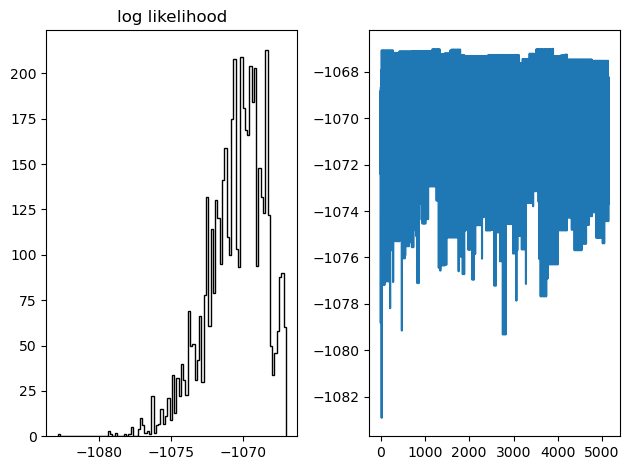

In [292]:
index= 1
def plot_log_likelihood(index,discard=1):
    filename = df_all['save_folder'][index] + "/sampler.h5"
    reader = Emcee_utils.hDFBackend_2(filename, name="single_core")
    flat_samples = reader.get_log_prob(discard=discard,flat=True)
    fig, axes = plt.subplots(1,2)
    flat_samples = flat_samples[flat_samples>-10e3]
    hist = axes[0].hist(flat_samples, 100, color="k", histtype="step")
    axes[0].set_title("log likelihood")
    axes[1].plot(np.arange(len(flat_samples)),flat_samples)
    fig.tight_layout()
    return fig, axes

plot_log_likelihood(1,discard=300)


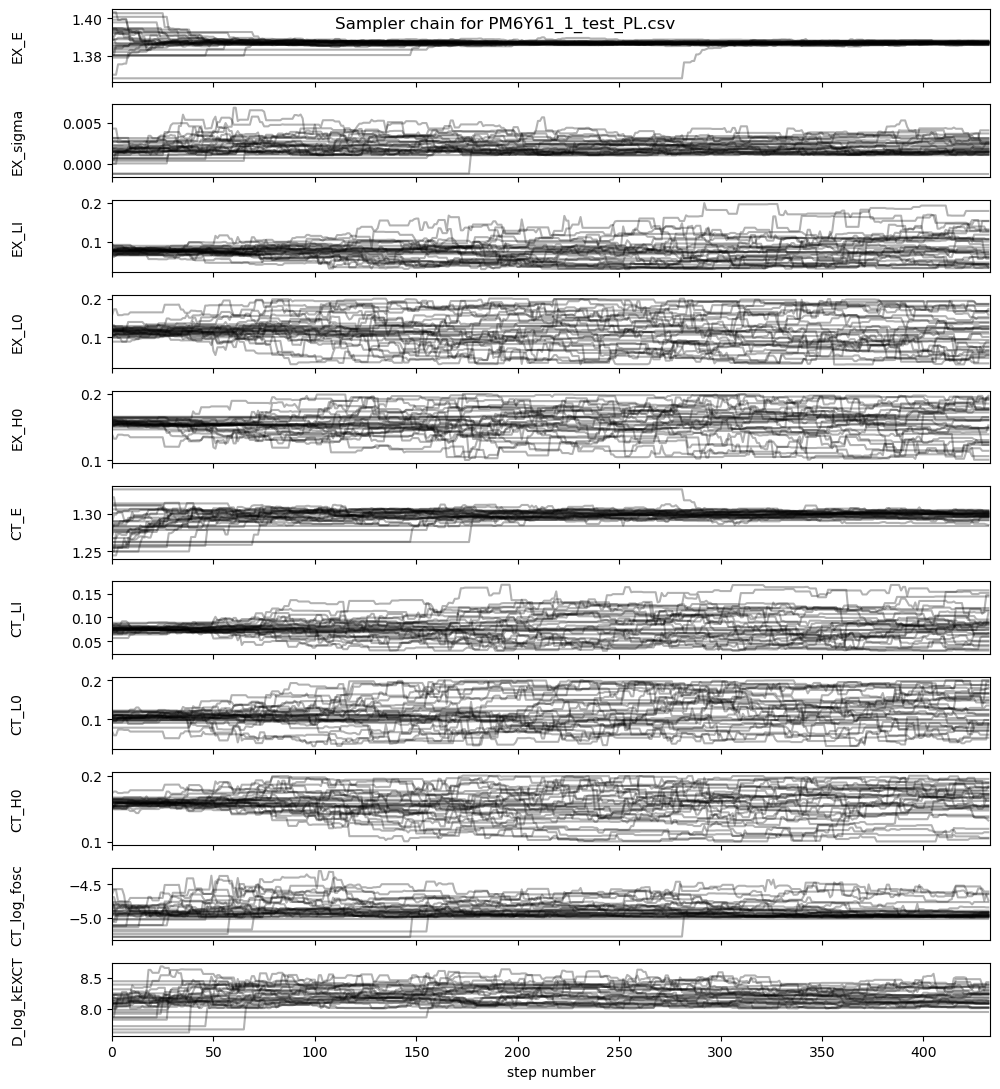

In [281]:
def plot_chains(id):
    filename = df_all['save_folder'][index] + "/sampler.h5"
    reader = Emcee_utils.hDFBackend_2(filename, name="single_core")
    samples = reader.get_chain()
    labels=[]
    params_to_fit = df_all['params_to_fit_init'][id]
    for key in params_to_fit.keys():
        for keys in params_to_fit[key].keys():
            labels.append(f"{key}_{keys}")
    ndim = len(labels)
    fig, axes = plt.subplots(ndim, figsize=(10, ndim*1), sharex=True)
    for i in range(ndim):
        ax = axes[i]
        ax.plot(samples[:, :, i], "k", alpha=0.3)
        ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)
    axes[-1].set_xlabel("step number")
    fig.tight_layout()
    fig.suptitle(f"Sampler chain for {df_all['csv_name_PL'][id].split('/')[-1]}")

    fig.show()
plot_chains(id=1)

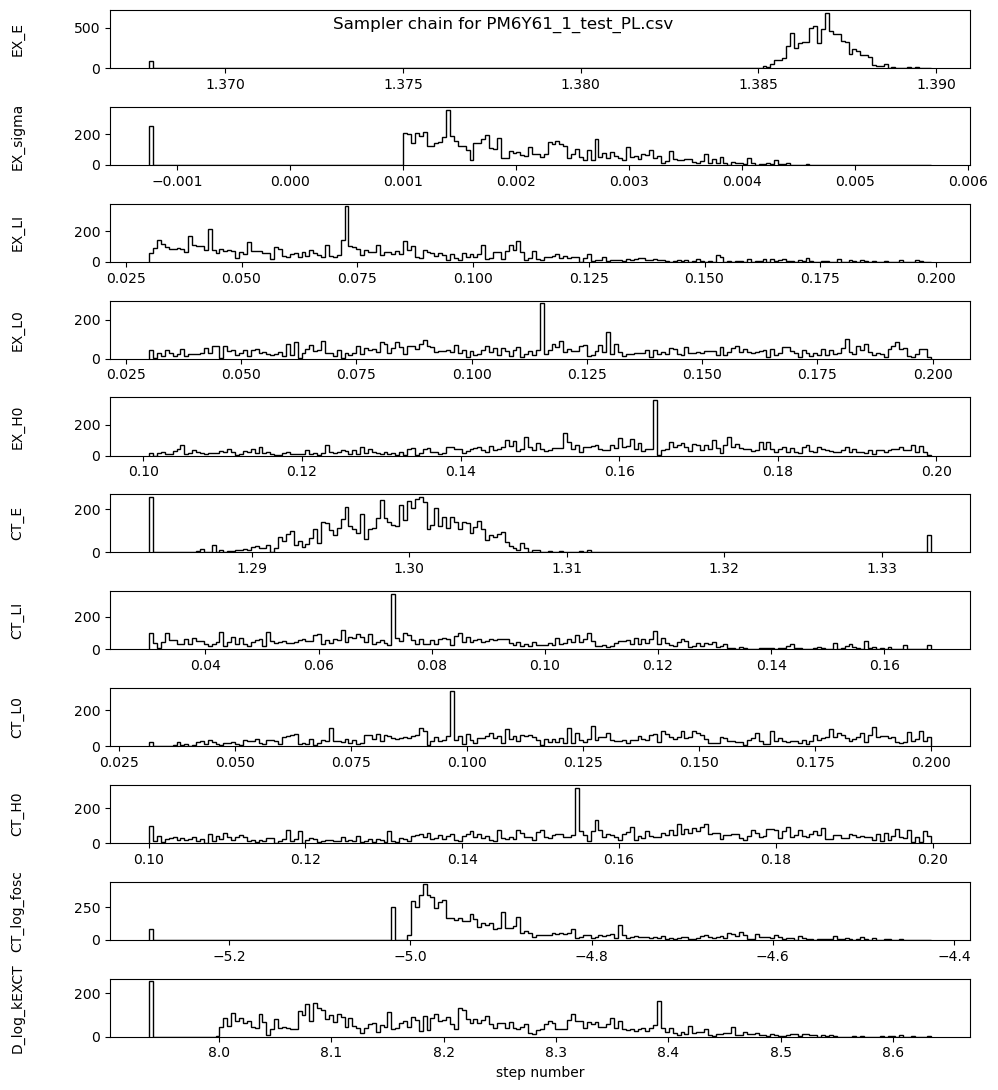

In [289]:
def plot_distribution(id,discard = 0):
    filename = df_all['save_folder'][id] + "/sampler.h5"
    reader = Emcee_utils.hDFBackend_2(filename, name="single_core")
    samples = reader.get_chain(discard=discard,flat=True)
    labels=[]
    params_to_fit = df_all['params_to_fit_init'][id]
    for key in params_to_fit.keys():
        for keys in params_to_fit[key].keys():
            labels.append(f"{key}_{keys}")
    ndim = len(labels)
    fig, axes = plt.subplots(ndim, figsize=(10, ndim*1))
    for i in range(ndim):
        ax = axes[i]
        ax.hist(samples[:, i], 200, color="k", histtype="step")
        ax.set_ylabel(labels[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)
    axes[-1].set_xlabel("step number")
    fig.tight_layout()
    fig.suptitle(f"Sampler chain for {df_all['csv_name_PL'][id].split('/')[-1]}")

    fig.show()
plot_distribution(1,discard=200)

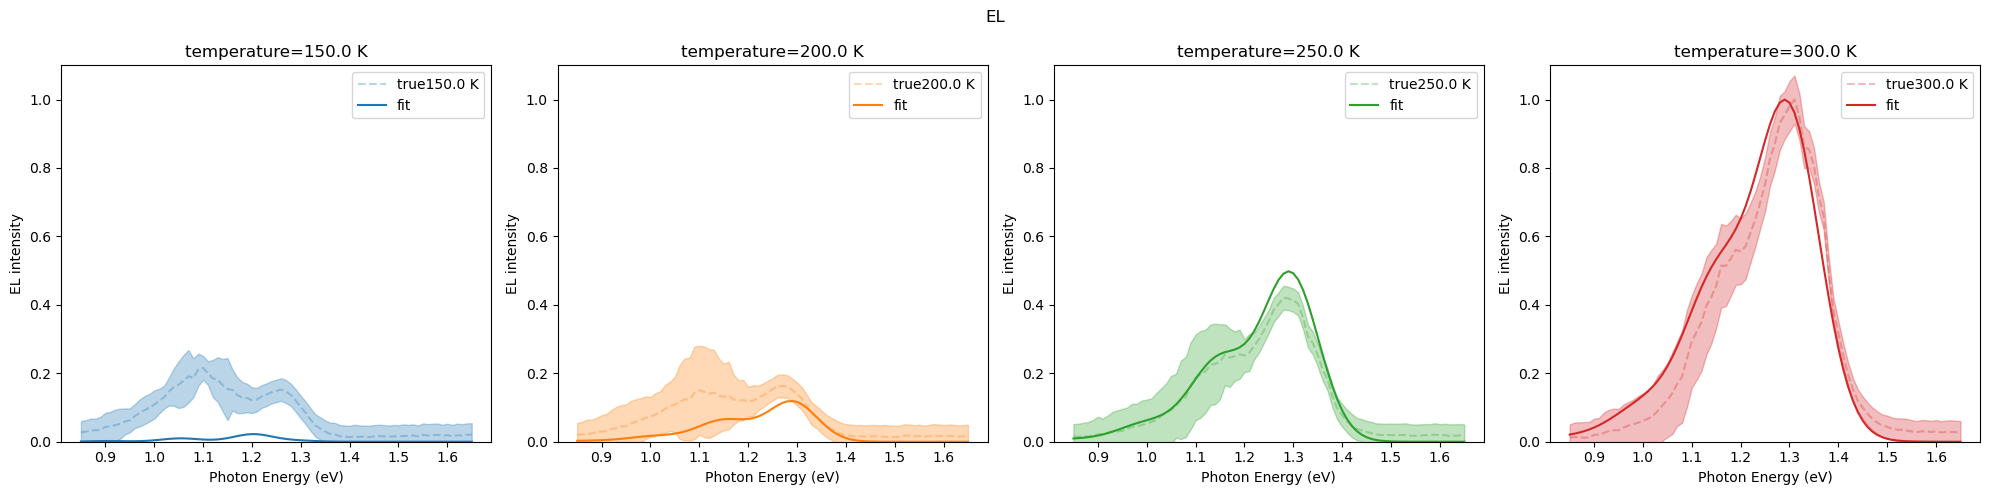

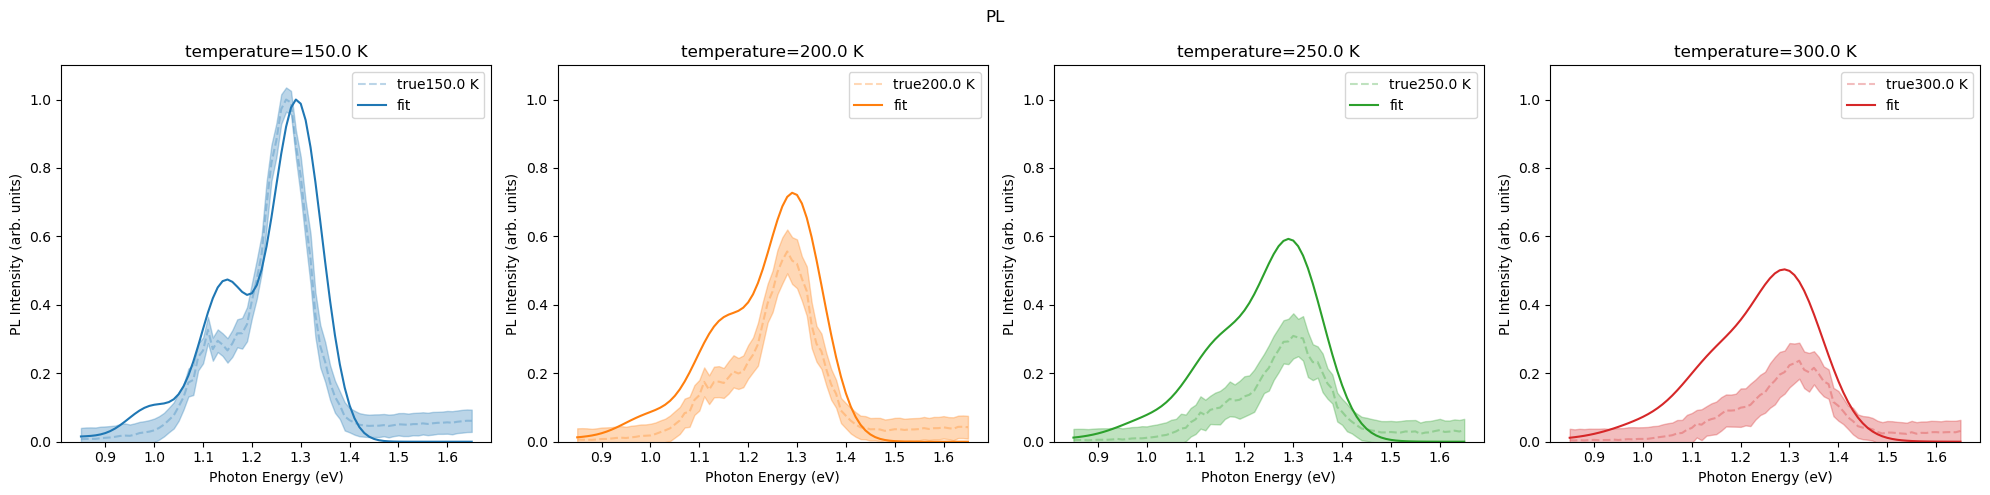

In [286]:
id =0
def plot_fit_results(id,discard=0):
    filename = df_all['save_folder'][id] + "/sampler.h5"
    reader = Emcee_utils.hDFBackend_2(filename, name="single_core")
    Exp_data_PL, temperature_list_PL, hws_PL = Exp_data_utils.read_data(df_all['csv_name_PL'][id])
    Exp_data_EL, temperature_list_EL, hws_EL = Exp_data_utils.read_data(df_all['csv_name_EL'][id])
    sample = reader.get_chain(discard=discard,flat=True)
    sample_num = np.random.randint(0, sample.shape[0])
    data_fit = sample[sample_num,:]
    true_parameters = fit_EL_utils.get_param_dict(params_to_fit_init,data_fit)
    fit_EL_utils.plot_exp_data_with_variance(
        temperature_list_EL,
        hws_EL,
        temperature_list_PL,
        hws_PL,
        variance_EL,
        variance_PL,
        save_folder,
        fixed_parameters_dict,
        true_parameters,
        Exp_data_PL,
        Exp_data_EL,
    )
plot_fit_results(1,discard=200)

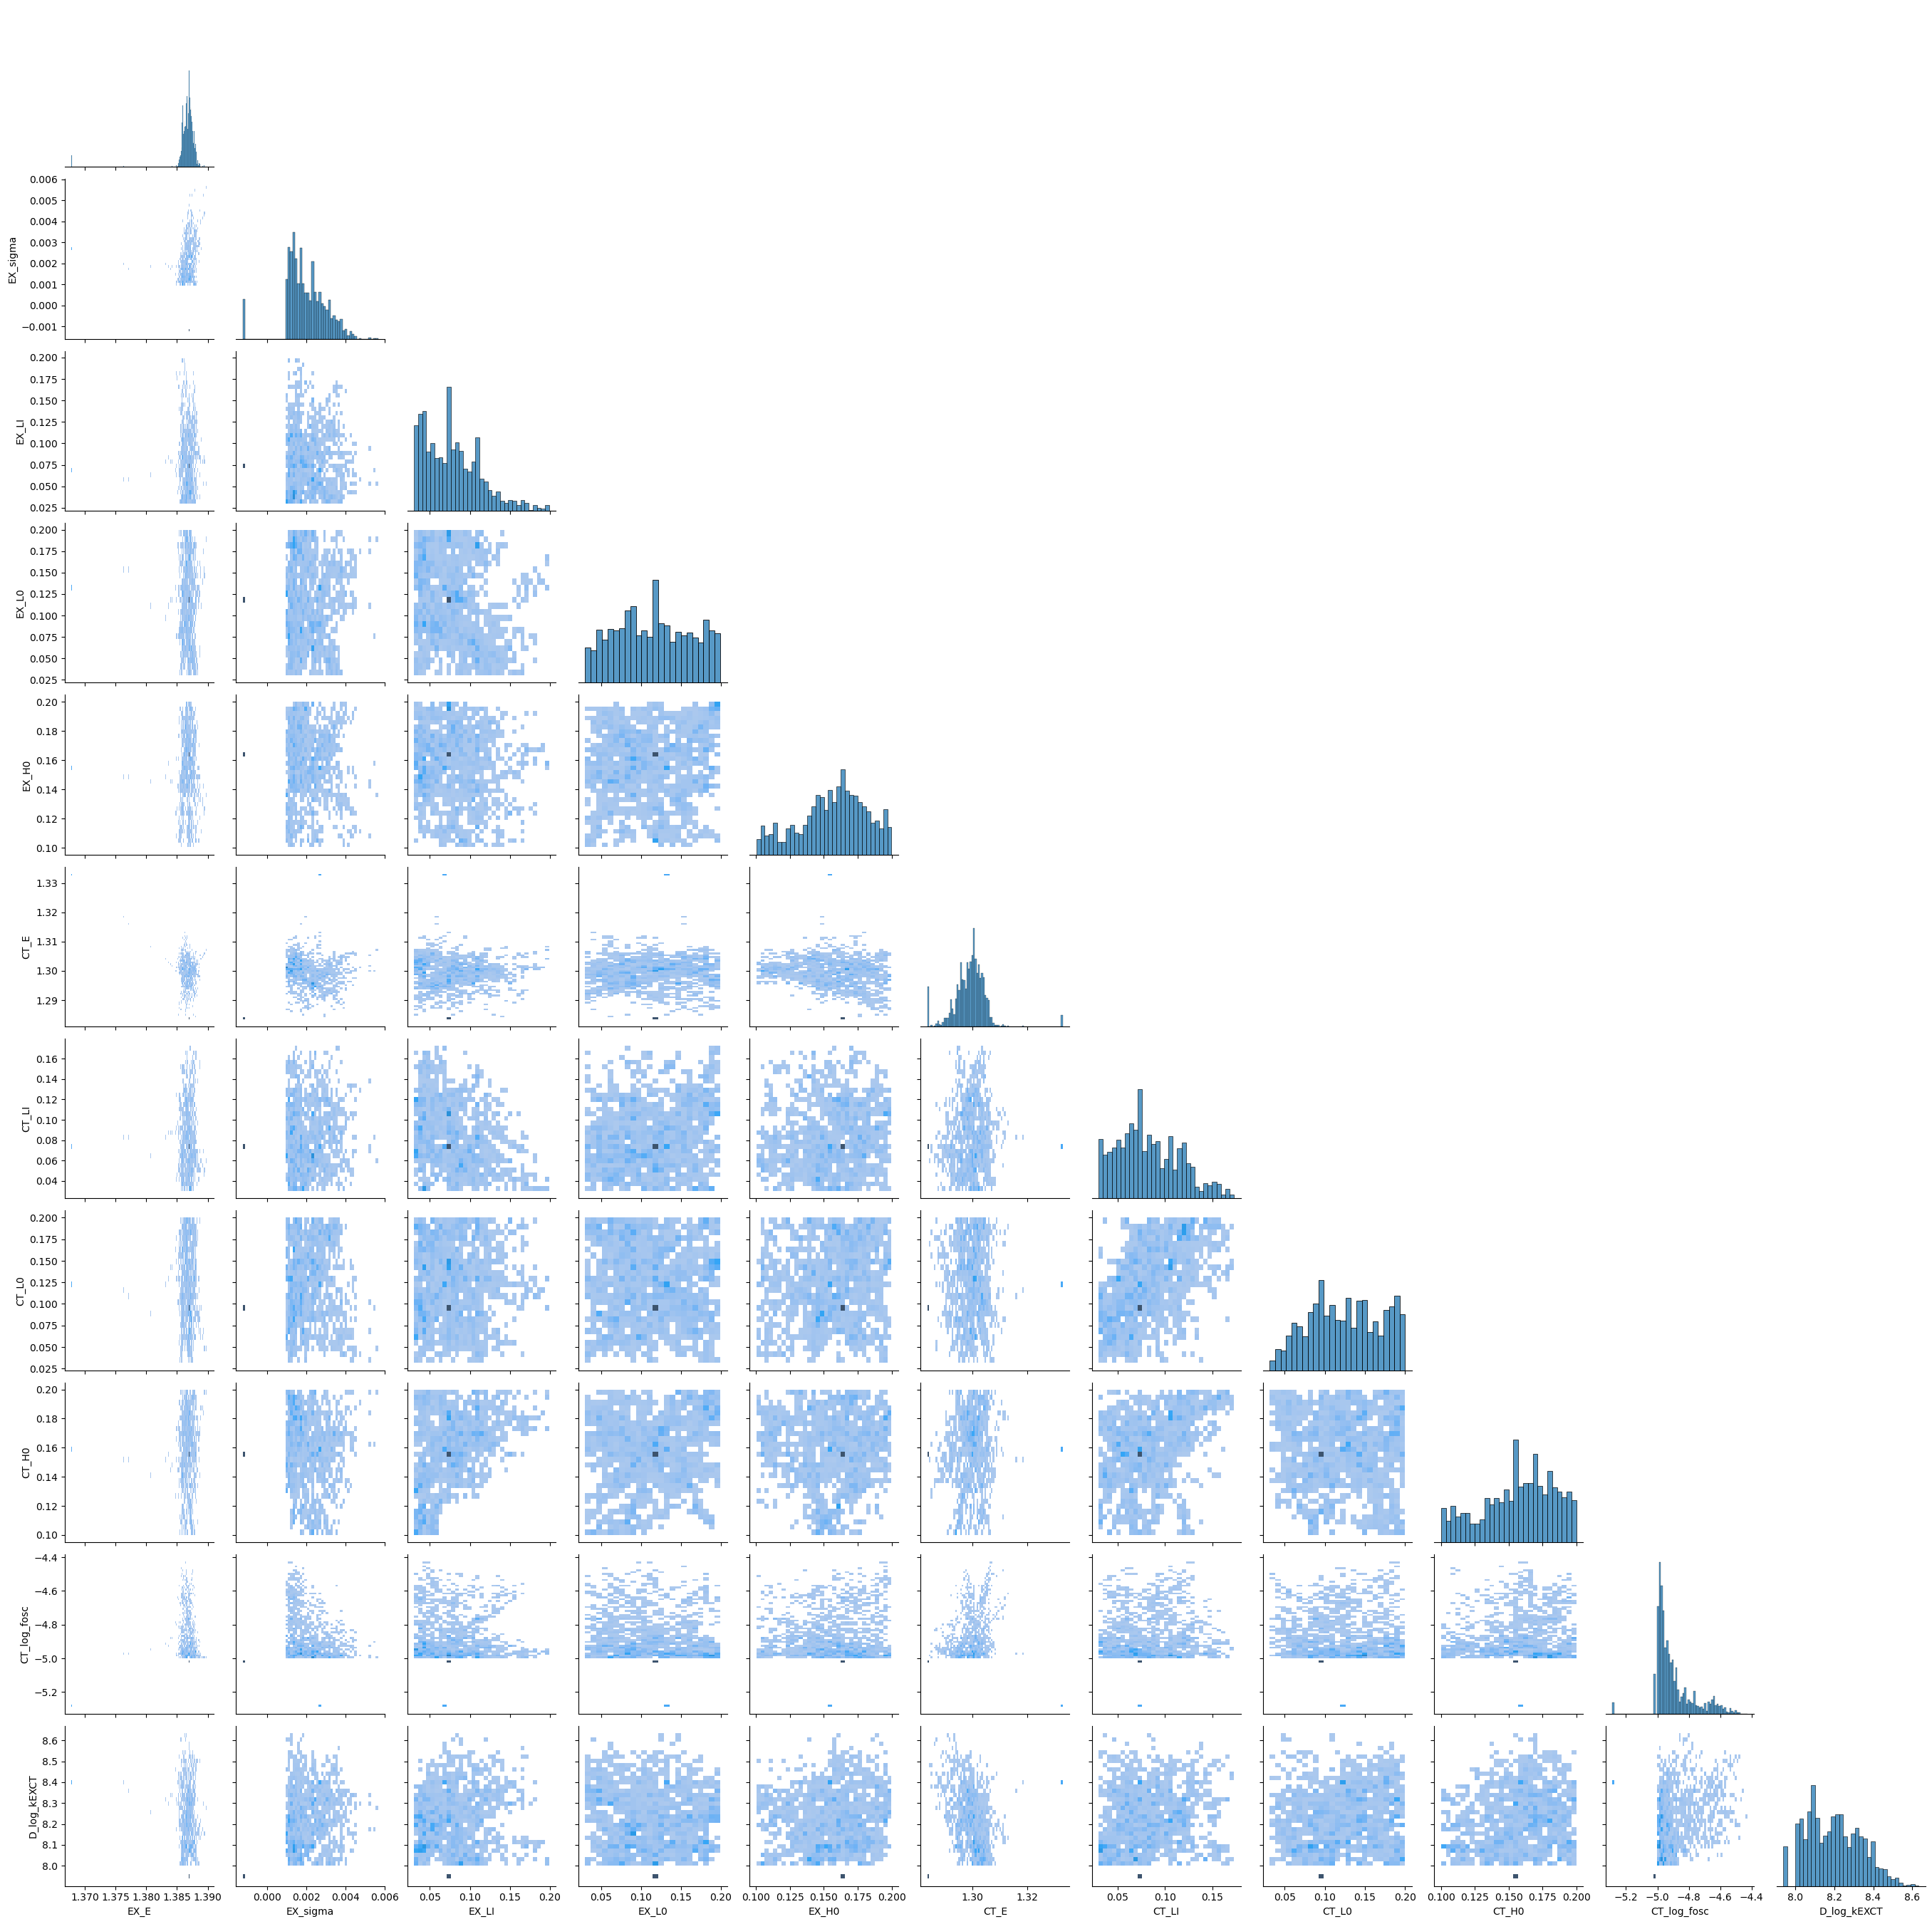

In [294]:
# plot a pair grid plot
import seaborn as sns
#plot posterior predictive
def plot_pair_plot(id,discard=0):
    filename = df_all['save_folder'][id] + "/sampler.h5"
    reader = Emcee_utils.hDFBackend_2(filename, name="single_core")
    samples = reader.get_chain(discard= discard, flat=True)
    labels=[]
    params_to_fit = df_all['params_to_fit_init'][id]
    for key in params_to_fit.keys():
        for keys in params_to_fit[key].keys():
            labels.append(f"{key}_{keys}")
    ndim = len(labels)
    df_samples = pd.DataFrame(samples, columns=labels)
    g = sns.pairplot(df_samples, kind="hist", corner=True)
    fig.suptitle(f"Sampler chain for {df_all['csv_name_PL'][id].split('/')[-1]}")
    g.figure.show()
plot_pair_plot(1,discard=200)